# 1- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# 2- Importing Data 

In [2]:
data_path = "train_data.csv"

data = pd.read_csv(data_path, sep=';',  header=None, skip_blank_lines=False)
# filling the first column that determines which sentence each word belongs to.
# data.fillna(method = 'ffill', inplace = True)
data.rename(columns = {0:'data'}, inplace = True)
data.head()

,data,1,2,3
0,NaN,NaN,NaN,NaN
1,EU,NaN,NaN,NaN
2,rejects,NaN,NaN,NaN
3,German,NaN,NaN,NaN
4,call,NaN,NaN,NaN


In [3]:
import pandas as pd

# file_path = 'drive/MyDrive/Colab Notebooks/compete data/train_gt.csv'
file_path = 'train_gt.csv'

label = pd.read_csv(file_path, header=None, names=['Labels'], skip_blank_lines=False)
data['label'] = label
data = data[['data', 'label']]

data['data'] = data['data'].fillna('')
data['label'] = data['label'].fillna('')

data

,data,label
0,,
1,EU,B-ORG
2,rejects,O
3,German,B-MISC
4,call,O
...,...,...
219547,three,
219548,Swansea,B-ORG
219549,1,O
219550,Lincoln,B-ORG


## Ready to create new data

In [5]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

def load_data(gt_path, data_path):
	with open(data_path) as f:
		data = f.read().splitlines()

	with open(gt_path, "r") as f:
		labels = f.read().splitlines()

	df = pd.DataFrame({"text": data, "label": labels})
	df = df[df["text"] != ";;;"]
	df["text"] = df["text"].apply(lambda x: x.replace(";;;", ""))
	df = df[~(df["label"].str.strip()=="")]
	df = df[~df["label"].str.contains(";")]

	df["label"] = df["label"].str.strip()

	df["label"] = np.where(df["label"] == "O O", "O", df["label"])
	return df

train = load_data("train_gt.csv", "train_data.csv")
valid = load_data("valid_gt.csv", "valid_data.csv")
ner_pos = LabelEncoder()
def rows_to_sentences_and_labels(df):
    sentences = []
    sentences_labels = []
    current_sentence = []
    current_labels = []

    for index, row in tqdm(df.iterrows(), total = len(df)):
        word, label = row['text'], row['label']
        current_sentence.append(word.strip())
        current_labels.append(label)
        if word.strip() == '.':
            sentences.append(current_sentence)
            sentences_labels.append(current_labels)
            current_sentence = []
            current_labels = []

    return sentences, sentences_labels

train_sentences, train_sentences_labels = rows_to_sentences_and_labels(train)
valid_sentences, valid_sentences_labels = rows_to_sentences_and_labels(valid)

100%|█████████████████████████████████████████████████████████████████████████| 50937/50937 [00:01<00:00, 29909.74it/s]


In [6]:
train_sentences[:5]

[['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'],
 ['Peter',
  'Blackburn',
  'BRUSSELS',
  '1996-08-22',
  'The',
  'European',
  'Commission',
  'said',
  'on',
  'Thursday',
  'it',
  'disagreed',
  'with',
  'German',
  'advice',
  'to',
  'consumers',
  'to',
  'shun',
  'British',
  'lamb',
  'until',
  'scientists',
  'determine',
  'whether',
  'mad',
  'cow',
  'disease',
  'can',
  'be',
  'transmitted',
  'to',
  'sheep',
  '.'],
 ['Germany',
  "'s",
  'representative',
  'to',
  'the',
  'European',
  'Union',
  "'s",
  'veterinary',
  'committee',
  'Werner',
  'Zwingmann',
  'said',
  'on',
  'Wednesday',
  'consumers',
  'should',
  'buy',
  'sheepmeat',
  'from',
  'countries',
  'other',
  'than',
  'Britain',
  'until',
  'the',
  'scientific',
  'advice',
  'was',
  'clearer',
  '.'],
 ['We',
  'do',
  "n't",
  'support',
  'any',
  'such',
  'recommendation',
  'because',
  'we',
  'do',
  "n't",
  'see',
  'any',
  'grounds',
  'for',
 

In [7]:
train_sentences_labels[:5]

[['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O'],
 ['B-PER',
  'I-PER',
  'B-LOC',
  'O',
  'O',
  'B-ORG',
  'I-ORG',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-MISC',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-MISC',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['B-LOC',
  'O',
  'O',
  'O',
  'O',
  'B-ORG',
  'I-ORG',
  'O',
  'O',
  'O',
  'B-PER',
  'I-PER',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-LOC',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-ORG',
  'O',
  'O',
  'O',
  'B-PER',
  'I-PER',
  'I-PER',
  'I-PER',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-ORG',
  'I-ORG',
  'O']]

In [8]:
import pandas as pd

ready_data = pd.DataFrame({'data': train_sentences, 'label': train_sentences_labels})

ready_data['sentence'] = ready_data['data'].apply(lambda x: ' '.join(x))
ready_data


,data,label,sentence
0,"[EU, rejects, German, call, to, boycott, Briti...","[B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]",EU rejects German call to boycott British lamb .
1,"[Peter, Blackburn, BRUSSELS, 1996-08-22, The, ...","[B-PER, I-PER, B-LOC, O, O, B-ORG, I-ORG, O, O...",Peter Blackburn BRUSSELS 1996-08-22 The Europe...
2,"[Germany, 's, representative, to, the, Europea...","[B-LOC, O, O, O, O, B-ORG, I-ORG, O, O, O, B-P...",Germany 's representative to the European Unio...
3,"[We, do, n't, support, any, such, recommendati...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",We do n't support any such recommendation beca...
4,"[He, said, further, scientific, study, was, re...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",He said further scientific study was required ...
...,...,...,...
7369,"[That, ;;O;O, and, the, fact, he, is, only, a,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",That ;;O;O and the fact he is only a few hours...
7370,"[-DOCSTART-, MOTORCYCLING, -, SAN, MARINO, GRA...","[O, O, O, B-LOC, I-LOC, B-MISC, I-MISC, O, O, O]",-DOCSTART- MOTORCYCLING - SAN MARINO GRAND PRI...
7371,"[IMOLA, ;;O;O, Italy, 1996-08-30, Practice, ti...","[B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O, B...",IMOLA ;;O;O Italy 1996-08-30 Practice times se...
7372,"[NORTHAMPTON, ;;O;O, England, 1996-08-30, Lead...","[B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O, B...",NORTHAMPTON ;;O;O England 1996-08-30 Leading s...


In [16]:
tags = data.label.unique()
tags

array(['', 'B-ORG', 'O', 'B-MISC', 'B-PER', 'I-PER', 'B-LOC', 'I-ORG',
       'I-MISC', 'I-LOC'], dtype=object)

# 3- Data Preprocessing

In [21]:
ready_data.head()

,data,label,sentence
0,"[EU, rejects, German, call, to, boycott, Briti...","[B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]",EU rejects German call to boycott British lamb .
1,"[Peter, Blackburn, BRUSSELS, 1996-08-22, The, ...","[B-PER, I-PER, B-LOC, O, O, B-ORG, I-ORG, O, O...",Peter Blackburn BRUSSELS 1996-08-22 The Europe...
2,"[Germany, 's, representative, to, the, Europea...","[B-LOC, O, O, O, O, B-ORG, I-ORG, O, O, O, B-P...",Germany 's representative to the European Unio...
3,"[We, do, n't, support, any, such, recommendati...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",We do n't support any such recommendation beca...
4,"[He, said, further, scientific, study, was, re...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",He said further scientific study was required ...


In [22]:
X = list(ready_data['sentence'])
Y = list(ready_data['label'])

In [23]:
Y_ready = Y

In [25]:
print("First three sentences: \n")
print(X[:3])

First three sentences: 

['EU rejects German call to boycott British lamb .', 'Peter Blackburn BRUSSELS 1996-08-22 The European Commission said on Thursday it disagreed with German advice to consumers to shun British lamb until scientists determine whether mad cow disease can be transmitted to sheep .', "Germany 's representative to the European Union 's veterinary committee Werner Zwingmann said on Wednesday consumers should buy sheepmeat from countries other than Britain until the scientific advice was clearer ."]


In [26]:
print("First three Tags: \n")
print(Y_ready[:3])

First three Tags: 

[['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O'], ['B-PER', 'I-PER', 'B-LOC', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-LOC', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]


We need to tokenize the sentences by mapping each word to a unique identifier, then we need to pad them because NN need the input sentences to have the same lenght.

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
print("Number of examples: {}".format(len(X)))

Number of examples: 7374


- **Toknize sentences**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer

vectorizer = TfidfVectorizer()

X_train_features = vectorizer.fit_transform(X_train)
X_dev_features = vectorizer.transform(X_dev)
X_test_features = vectorizer.transform(X_test)

In [111]:
maxlen = 256

max_words = 36000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [112]:
X[1]

'Peter Blackburn BRUSSELS 1996-08-22 The European Commission said on Thursday it disagreed with German advice to consumers to shun British lamb until scientists determine whether mad cow disease can be transmitted to sheep .'

In [113]:
sequences[1]

[765,
 1880,
 749,
 20,
 22,
 86,
 2,
 228,
 345,
 10,
 9,
 72,
 28,
 7297,
 23,
 208,
 3936,
 5,
 2421,
 5,
 10291,
 217,
 5708,
 417,
 3385,
 2019,
 541,
 1765,
 1881,
 663,
 326,
 41,
 7298,
 5,
 1648]

In [32]:
words = X[1].split()

num_words = len(words)

print("Number of words:", num_words)

Number of words: 34


In [33]:
len(sequences[1])

35

In [34]:
len(sequences)

7374

In [35]:
word_index = tokenizer.word_index
print("Found {} unique tokens.".format(len(word_index)))
ind2word = dict([(value, key) for (key, value) in word_index.items()])

Found 17563 unique tokens.


In [37]:
word2id = word_index

In [38]:
id2word = {}
for key, value in word2id.items():
    id2word[value] = key

In [39]:
# id2word

- **Sentences padding**

In [40]:
X_preprocessed = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [41]:
X_preprocessed[0]

array([  946, 10290,   208,   631,     5,  3935,   217,  5708,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [42]:
X_preprocessed[7373]

array([ 21,  88, 389,  88,  81,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

- **Preprocess tags**

In [43]:
tags2id = {}
for i, tag in enumerate(tags):
    tags2id[tag] = i

In [44]:
tags2id

{'': 0,
 'B-ORG': 1,
 'O': 2,
 'B-MISC': 3,
 'B-PER': 4,
 'I-PER': 5,
 'B-LOC': 6,
 'I-ORG': 7,
 'I-MISC': 8,
 'I-LOC': 9}

In [45]:
id2tag = {}
for key, value in tags2id.items():
    id2tag[value] = key

In [46]:
id2tag

{0: '',
 1: 'B-ORG',
 2: 'O',
 3: 'B-MISC',
 4: 'B-PER',
 5: 'I-PER',
 6: 'B-LOC',
 7: 'I-ORG',
 8: 'I-MISC',
 9: 'I-LOC'}

In [47]:
def preprocess_tags(tags2id, Y_ready):
    
    Y_preprocessed = []
    maxlen = 256
    for y in Y_ready:
        
        Y_place_holder = []
        
        for tag in y:
            Y_place_holder.append(tags2id[tag])
        
        len_new_tag_list = len(Y_place_holder)
        num_O_to_add = maxlen - len_new_tag_list
        
        padded_tags = Y_place_holder + ([tags2id['O']] * num_O_to_add)
        Y_preprocessed.append(padded_tags[:maxlen])
        
    return Y_preprocessed

In [48]:
Y_preprocessed = preprocess_tags(tags2id, Y_ready)

In [49]:
print(Y_preprocessed[7373])

[2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [50]:
print(Y_preprocessed[0])

[1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [52]:
print(Y_ready[0])

['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']


- **Data shuffling and splitting**

In [53]:
print("The Lenght of training examples: {}".format(len(X_preprocessed)))
print("The Lenght of training targets: {}".format(len(Y_preprocessed)))

The Lenght of training examples: 7374
The Lenght of training targets: 7374


In [54]:
X_preprocessed = np.asarray(X_preprocessed)
# Y_preprocessed = [np.array(inner_list) for inner_list in Y_preprocessed]
Y_preprocessed = np.asarray(Y_preprocessed)
# Y_preprocessed = np.asarray(Y_preprocessed_arrays)

In [55]:
Y_preprocessed

array([[1, 2, 3, ..., 2, 2, 2],
       [4, 5, 6, ..., 2, 2, 2],
       [6, 2, 2, ..., 2, 2, 2],
       ...,
       [6, 2, 6, ..., 2, 2, 2],
       [6, 2, 6, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [56]:
X_preprocessed

array([[  946, 10290,   208, ...,     0,     0,     0],
       [  765,  1880,   749, ...,     0,     0,     0],
       [  142,    12,  3006, ...,     0,     0,     0],
       ...,
       [17545,     1,     1, ...,     0,     0,     0],
       [ 1915,     1,     1, ...,     0,     0,     0],
       [   21,    88,   389, ...,     0,     0,     0]])

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_preprocessed,Y_preprocessed, test_size=0.20)

# 4- Model Training and Evaluation

In [131]:
X_train[1000]

array([   21,    47,   411,  2319,  1609,     5, 15596,  1760,    77,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [132]:
Y_train[1000]

array([2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
id2word[729]

'jordan'

## Load dataset to the model using train_dataset = tf.data.Dataset 


In [134]:
X_train[:2]

array([[1286,  224,  454,   40, 2522,  219,    5,  374,   56, 1727,    1,
           1,   26,   10,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [135]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [136]:
BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [137]:
embedding_dim = 300
maxlen = 256
max_words = 36000
num_tags = len(tags)

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
#     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_tags, activation='softmax'))
# ])

In [140]:
import tensorflow as tf

embedding_dim = 300
maxlen = 256
max_words = 36000
num_tags = len(tags)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation='relu')),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_tags, activation='softmax'))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [143]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 300)          10800000  
                                                                 
 bidirectional_4 (Bidirectio  (None, 256, 256)         439296    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256, 256)         394240    
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 256, 128)         164352    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 256, 64)          8256      
 tributed)                                            

In [144]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [145]:
# train_dataset.shape

In [146]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=15)

Epoch 1/15
45/45 [==============================] - 151s 3s/step - loss: 0.9645 - accuracy: 0.8249 - val_loss: 0.7239 - val_accuracy: 0.8472
Epoch 2/15
45/45 [==============================] - 129s 3s/step - loss: 0.7544 - accuracy: 0.8411 - val_loss: 0.7114 - val_accuracy: 0.8472
Epoch 3/15
45/45 [==============================] - 127s 3s/step - loss: 0.7381 - accuracy: 0.8408 - val_loss: 0.6862 - val_accuracy: 0.8472
Epoch 4/15
45/45 [==============================] - 126s 3s/step - loss: 0.7151 - accuracy: 0.8409 - val_loss: 0.6478 - val_accuracy: 0.8470
Epoch 5/15
45/45 [==============================] - 127s 3s/step - loss: 0.6538 - accuracy: 0.8412 - val_loss: 0.5871 - val_accuracy: 0.8482
Epoch 6/15
45/45 [==============================] - 128s 3s/step - loss: 0.6016 - accuracy: 0.8420 - val_loss: 0.5533 - val_accuracy: 0.8496
Epoch 7/15
45/45 [==============================] - 130s 3s/step - loss: 0.5615 - accuracy: 0.8444 - val_loss: 0.5173 - val_accuracy: 0.8517
Epoch 8/15
45

In [84]:
model.evaluate(test_dataset)

9/9 [==============================] - 6s 639ms/step - loss: 0.6121 - accuracy: 0.8293


[0.6120505928993225, 0.8292989730834961]

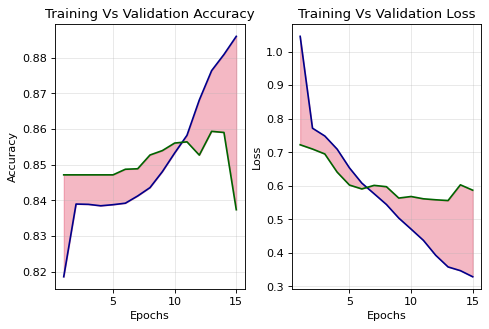

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(6, 4), dpi=80)

ax[0].plot(epochs, acc, label = "Training Accuracy", color='darkblue')
ax[0].plot(epochs, val_acc, label = "Validation Accuracy", color='darkgreen')
ax[0].grid(alpha=0.3)
ax[0].title.set_text('Training Vs Validation Accuracy')
ax[0].fill_between(epochs, acc, val_acc, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs')
plt.setp(ax[0], ylabel='Accuracy')


ax[1].plot(epochs, loss, label = "Training Loss", color='darkblue')
ax[1].plot(epochs, val_loss, label = "Validation Loss", color='darkgreen')
ax[1].grid(alpha=0.3)
ax[1].title.set_text('Training Vs Validation Loss')
ax[1].fill_between(epochs,loss, val_loss, color='crimson', alpha=0.3)
plt.setp(ax[1], xlabel='Epochs')
plt.setp(ax[1], ylabel='Loss')

plt.show()

In [86]:
def make_prediction(model, preprocessed_sentence, id2word, id2tag):
    
    preprocessed_sentence = preprocessed_sentence.reshape((1, 256))
     
    sentence = preprocessed_sentence[preprocessed_sentence > 0]
    word_list = []
    for word in list(sentence):
        word_list.append(id2word[word])
    orginal_sententce = ' '.join(word_list)
    
    len_orginal_sententce = len(word_list)
    
    prediction = model.predict(preprocessed_sentence)
    prediction = np.argmax(prediction[0], axis=1)
    
    prediction = list(prediction)[ : len_orginal_sententce] 
    
    pred_tag_list = []
    for tag_id in prediction:
        pred_tag_list.append(id2tag[tag_id])
    
    return (orginal_sententce,  pred_tag_list)

In [87]:
(orginal_sententce,  pred_tag_list) = make_prediction(model=model,
                                                    preprocessed_sentence=X_test[520],
                                                    id2word=id2word,
                                                    id2tag=id2tag)

1/1 [==============================] - 6s 6s/step


In [91]:
make_prediction(model=loaded_model, preprocessed_sentence=X_test[100], id2word=id2word, id2tag=id2tag)[1]

1/1 [==============================] - 1s 1s/step


['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [92]:
make_prediction(model=loaded_model, preprocessed_sentence=X_test[200], id2word=id2word, id2tag=id2tag)[0]

1/1 [==============================] - 0s 37ms/step


'jerry bieszk 312 408 8725 docstart wheat rains boost u s hrw planting prospects'

In [93]:
X_test[520]

array([  325,   341,    20,    22,    86,  7857,  6186,   155,    12,
        2120,   504,    74,  5735,   381, 11200,     3,  3031,   388,
          36,    55,  4189,  2340,     1,     1, 11201, 11202, 11203,
         640,    10,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [94]:
print(orginal_sententce)

hong kong 1996 08 22 ka wah bank 's hk 43 million floating rate certificate of deposit issue has been privately placed o o sole arranger hsbc markets said


In [95]:
print(pred_tag_list)

['B-LOC', 'I-LOC', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


# Load the model

In [89]:
model.save('ner_nn_model_2.h5')

In [90]:
loaded_model = tf.keras.models.load_model('ner_nn_model.h5')

In [96]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 300)          10800000  
                                                                 
 bidirectional_6 (Bidirectio  (None, 256, 200)         320800    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 256, 200)         240800    
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 256, 10)          2010      
 tributed)                                                       
                                                                 
Total params: 11,363,610
Trainable params: 11,363,610
Non-trainable params: 0
__________________________________________

# Check the model

In [ ]:
a = make_prediction(model=loaded_model, preprocessed_sentence=pad_sequences(tokenizer.texts_to_sequences(['Lucas']), maxlen=maxlen, padding='post'), id2word=id2word, id2tag=id2tag)[1]
a

# Making prediction

In [97]:
from pandas import read_csv

# data = read_csv('drive/MyDrive/Colab Notebooks/compete data/train_data.csv', sep=';',  header=None, skip_blank_lines=False)
test_data = read_csv('test_data.csv', sep=';',  header=None, skip_blank_lines=False)
# data = read_csv('drive/MyDrive/Colab Notebooks/compete data/train_data.csv', sep=';')

len(test_data)

test_data.rename(columns = {0:'data'}, inplace = True)

test_data['data'] = test_data['data'].fillna('')

test_d = test_data["data"]

# X_test_d_features = tokenizer.transform(test_d)

In [98]:
test_data

,data
0,RUGBY
1,UNION
2,-
3,CUTTITTA
4,BACK
...,...
49296,3
49297,11
49298,8
49299,30


In [99]:
import pandas as pd

chunk_size = 256

new_df = pd.DataFrame(columns=['sentence'])

for i in range(0, len(test_data['data']), chunk_size):
    sentence = test_data['data'].iloc[i:i+chunk_size].tolist()
    sentence += [''] * (chunk_size - len(sentence))
    new_df = new_df.append({'sentence': sentence}, ignore_index=True)

print(new_df)

                                              sentence
0    [RUGBY , UNION , - , CUTTITTA , BACK , FOR , I...
1    [Properzi , Curti , , , Carlo , Orlandi , , , ...
2    [brightly , but , Bitar , denied , them , an ,...
3    [23.25 ,  , 8. , Dominick , Gauthier , ( , Can...
4    [-DOCSTART- ,  , CRICKET , - , PAKISTAN , V , ...
..                                                 ...
188  [27 ,  , NY , RANGERS , 11 , 13 , 5 , 97 , 86 ...
189  [ , Pittsburgh , 5 , WASHINGTON , 3 ,  , Montr...
190  [outpointed , Cuba , 's , Jose , Ribalta , in ...
191  [ , Their , other , marksmen , were , Brazilia...
192  [ , Real , Sociedad , 15 , 7 , 3 , 5 , 20 , 18...

[193 rows x 1 columns]


C:\Users\hieuq\AppData\Local\Temp\ipykernel_13320\1111861228.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'sentence': sentence}, ignore_index=True)
C:\Users\hieuq\AppData\Local\Temp\ipykernel_13320\1111861228.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'sentence': sentence}, ignore_index=True)
C:\Users\hieuq\AppData\Local\Temp\ipykernel_13320\1111861228.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'sentence': sentence}, ignore_index=True)
C:\Users\hieuq\AppData\Local\Temp\ipykernel_13320\1111861228.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [102]:
new_df['sen'] = new_df['sentence'].apply(lambda x: ''.join(x))

In [103]:
new_df

,sentence,sen
0,"[RUGBY , UNION , - , CUTTITTA , BACK , FOR , I...",RUGBY UNION - CUTTITTA BACK FOR ITALY AFTER A ...
1,"[Properzi , Curti , , , Carlo , Orlandi , , , ...","Properzi Curti , Carlo Orlandi , Massimo Cutti..."
2,"[brightly , but , Bitar , denied , them , an ,...",brightly but Bitar denied them an equaliser wh...
3,"[23.25 , , 8. , Dominick , Gauthier , ( , Can...",23.25 8. Dominick Gauthier ( Canada ) 22.73 ...
4,"[-DOCSTART- , , CRICKET , - , PAKISTAN , V , ...",-DOCSTART- CRICKET - PAKISTAN V NEW ZEALAND O...
...,...,...
188,"[27 , , NY , RANGERS , 11 , 13 , 5 , 97 , 86 ...",27 NY RANGERS 11 13 5 97 86 27 NY ISLANDERS ...
189,"[ , Pittsburgh , 5 , WASHINGTON , 3 , , Montr...",Pittsburgh 5 WASHINGTON 3 Montreal 3 CHICAGO...
190,"[outpointed , Cuba , 's , Jose , Ribalta , in ...",outpointed Cuba 's Jose Ribalta in their Inter...
191,"[ , Their , other , marksmen , were , Brazilia...",Their other marksmen were Brazilian defender ...


In [105]:
sen = new_df['sen']

In [122]:
a = make_prediction(model=loaded_model, preprocessed_sentence=pad_sequences(tokenizer.texts_to_sequences(['Lucas']), maxlen=maxlen, padding='post'), id2word=id2word, id2tag=id2tag)[1]
a

1/1 [==============================] - 0s 50ms/step


['O']

In [ ]:
make_prediction(model=loaded_model, preprocessed_sentence=pad_sequences(tokenizer.texts_to_sequences([new_df['sentence'][0]]), maxlen=maxlen, padding='post'), id2word=id2word, id2tag=id2tag)[1][0])

In [183]:
new_df['label'] = new_df['sen'].apply(lambda x: make_prediction(model=loaded_model, preprocessed_sentence=pad_sequences(tokenizer.texts_to_sequences([x]), maxlen=maxlen, padding='post'), id2word=id2word, id2tag=id2tag)[1])

1/1 [==============================] - 0s 41ms/step


In [184]:
new_df

,sentence,sen,label
0,"[RUGBY , UNION , - , CUTTITTA , BACK , FOR , I...",RUGBY UNION - CUTTITTA BACK FOR ITALY AFTER A ...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"[Properzi , Curti , , , Carlo , Orlandi , , , ...","Properzi Curti , Carlo Orlandi , Massimo Cutti...","[B-PER, B-PER, I-PER, I-PER, O, O, O, O, O, O,..."
2,"[brightly , but , Bitar , denied , them , an ,...",brightly but Bitar denied them an equaliser wh...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,"[23.25 , , 8. , Dominick , Gauthier , ( , Can...",23.25 8. Dominick Gauthier ( Canada ) 22.73 ...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4,"[-DOCSTART- , , CRICKET , - , PAKISTAN , V , ...",-DOCSTART- CRICKET - PAKISTAN V NEW ZEALAND O...,"[O, O, B-LOC, O, O, O, O, O, O, O, O, B-MISC, ..."
...,...,...,...
188,"[27 , , NY , RANGERS , 11 , 13 , 5 , 97 , 86 ...",27 NY RANGERS 11 13 5 97 86 27 NY ISLANDERS ...,"[O, B-ORG, O, O, O, O, O, O, O, O, O, O, O, O,..."
189,"[ , Pittsburgh , 5 , WASHINGTON , 3 , , Montr...",Pittsburgh 5 WASHINGTON 3 Montreal 3 CHICAGO...,"[O, O, O, O, O, O, I-ORG, I-ORG, I-ORG, O, O, ..."
190,"[outpointed , Cuba , 's , Jose , Ribalta , in ...",outpointed Cuba 's Jose Ribalta in their Inter...,"[B-LOC, O, O, O, O, B-MISC, I-MISC, O, O, O, O..."
191,"[ , Their , other , marksmen , were , Brazilia...",Their other marksmen were Brazilian defender ...,"[O, O, B-MISC, O, O, O, O, O, O, O, O, O, O, O..."


In [186]:
test_data = new_df['label']
sum = 0
for x in test_data:
    sum += len(x)
print(sum)

38622


In [182]:
new_df['label'][191]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-MISC',
 'B-MISC',
 'I-MISC',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 

In [ ]:
y_test_d_predictions = test_data['label'].values

In [ ]:
import numpy as np
import csv

csv_file_path = 'output_nnn.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for item in y_test_d_predictions:
        csvwriter.writerow([item])

print(f"Array has been written to {csv_file_path}")

In [ ]:
import zipfile

csv_file_path = 'output_nnn.csv'
zip_file_path = 'output_nnn.csv.zip'

# Create a Zip file and add the CSV file to it
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_file_path, arcname='output_nnn.csv')

print(f"{csv_file_path} has been zipped to {zip_file_path}")

In [ ]:
# Import necessary libraries
import torch
from transformers import BertTokenizer, BertForTokenClassification
from transformers import AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForTokenClassification.from_pretrained("bert-base-uncased", num_labels=NUM_LABELS)  # Set NUM_LABELS according to your dataset

# Tokenization
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)
        tokenized_sentence.extend(tokenized_word)
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

# Assuming `sentences` and `labels` are lists containing sentences and their corresponding labels
tokenized_texts_and_labels = [tokenize_and_preserve_labels(sent, labs) for sent, labs in zip(sentences, labels)]
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

# Convert tokenized text and labels to tensor format
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts], maxlen=MAX_LEN, dtype="long", value=0.0, truncating="post", padding="post")
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels], maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post", dtype="long", truncating="post")

# Create attention masks to ignore padded tokens
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]

# Split data into train and validation sets and wrap them in DataLoader for efficient batching

# Fine-tuning setup
optimizer = AdamW(model.parameters(), lr=3e-5, eps=1e-8)
total_steps = len(train_dataloader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
for _ in range(EPOCHS):
    model.train()
    for batch in train_dataloader:
        b_input_ids, b_labels, b_masks = batch
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_masks, labels=b_labels)
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        scheduler.step()
        model.zero_grad()
    # Validation loop can be added here

model.save_pretrained("./ner_model")